# Describing Function Analysis

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import control
from system_sim import System

In [20]:
SIM_TIME = 50
T_STEP = 0.01

s = control.tf('s')

## Define System

### Laplace Representation

In [21]:
G = 1/(s*(s+1)*(s+1))
G

TransferFunction(array([1]), array([1, 2, 1, 0]))

### State Space

In [22]:
G_ss = control.tf2ss(G)
G_ss

StateSpace(array([[-2., -1., -0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]]), array([[1.],
       [0.],
       [0.]]), array([[0., 0., 1.]]), array([[0.]]))

## Define Nonlinearity - Saturation

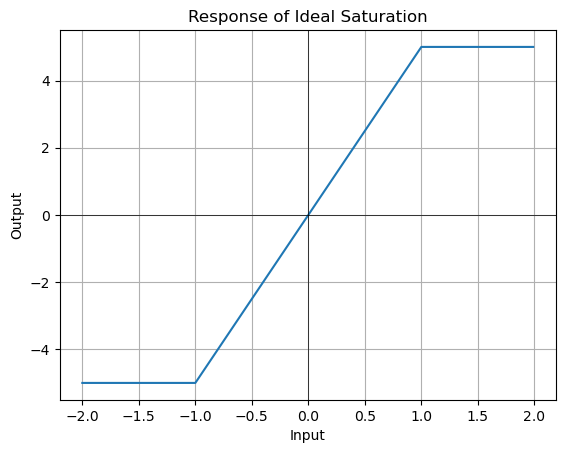

In [23]:
# Saturation Constant
k = 5
M = 1

def sat(x):
    return k*x if -M<x<M else k*M if x>=M else -k*M

x = list(range(-200,200))
x = [i/100 for i in x]
y = [sat(i) for i in x]

plt.plot(x,y)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Response of Ideal Saturation")
plt.grid()
plt.show()

### Describing Function

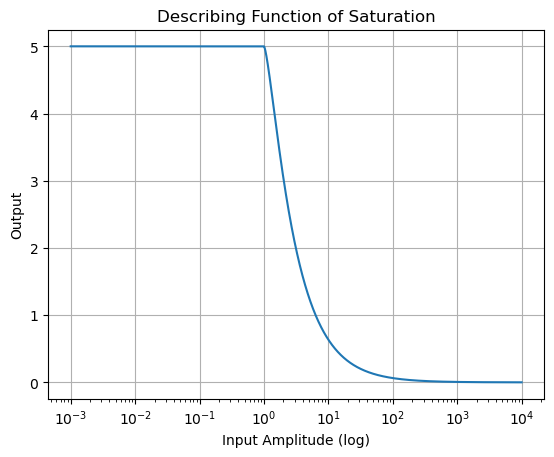

In [24]:
def describing_func(A):
    N = np.zeros(len(A))
    N[A>=M] = (2*k/np.pi) * (np.arcsin(M/A[A>=M]) + (M/A[A>=M])*np.sqrt(1-(M/A[A>=M])**2))
    N[A<M] = k

    return N

A = np.logspace(-3, 4, 10000)
N = describing_func(A)
plt.semilogx(A,N)
plt.title("Describing Function of Saturation")
plt.xlabel("Input Amplitude (log)")
plt.ylabel("Output")
plt.grid()
plt.show()

## Closed Loop System - No Input

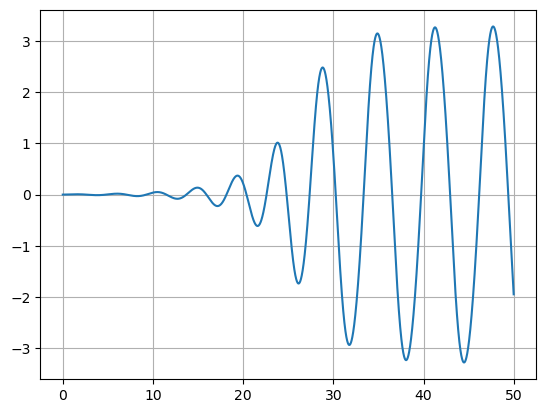

In [25]:
sys = System(G_ss, T_STEP)
n = int(SIM_TIME/T_STEP)

# Input has small initial disturbance

u = [0]*n
for i in range(5):
    u[i] = 0.1

y = [0]
e = [0]
x = [0]
t = [0]

for i in range(1,n):
    e.append(u[i]-y[i-1])
    x.append(sat(e[i]))
    y.append(sys(x[i]))
    t.append(sys.t_step*i)

plt.plot(t,y)
plt.grid()
plt.show()

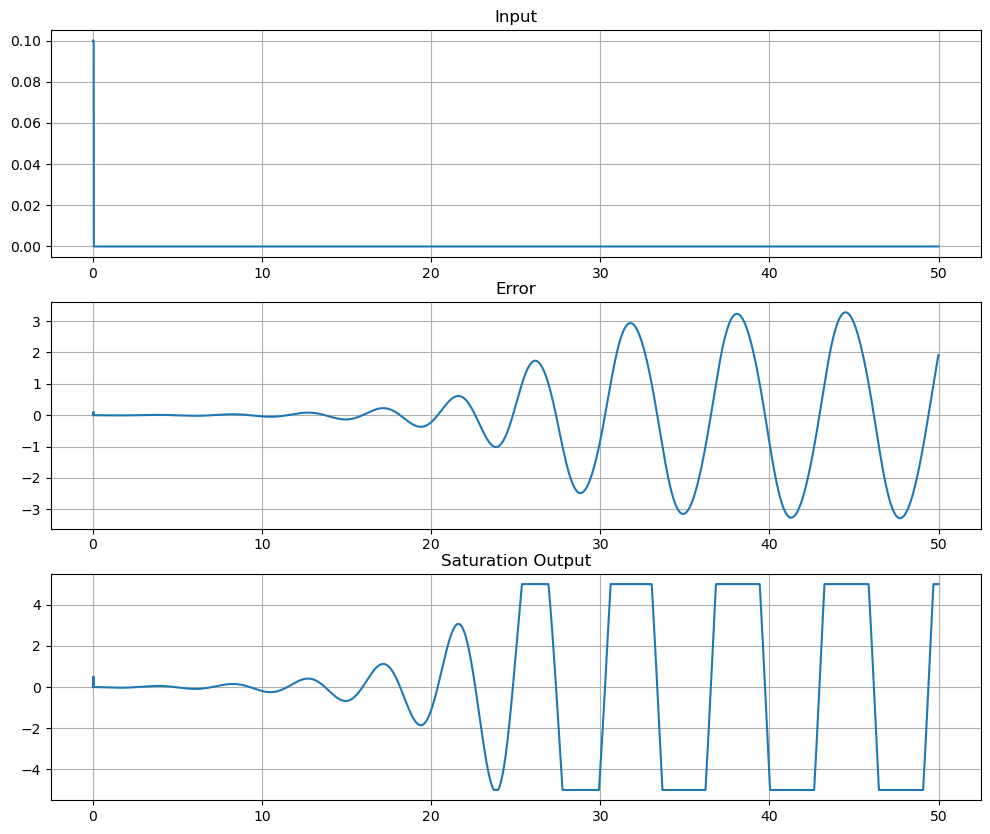

In [26]:
plt.figure(figsize=(12,10))

plt.subplot(3,1,1)
plt.title("Input")
plt.grid()
plt.plot(t, u)

plt.subplot(3,1,2)
plt.title("Error")
plt.grid()
plt.plot(t, e)

plt.subplot(3,1,3)
plt.title("Saturation Output")
plt.grid()
plt.plot(t, x)

plt.show()

### Nyquist Plot

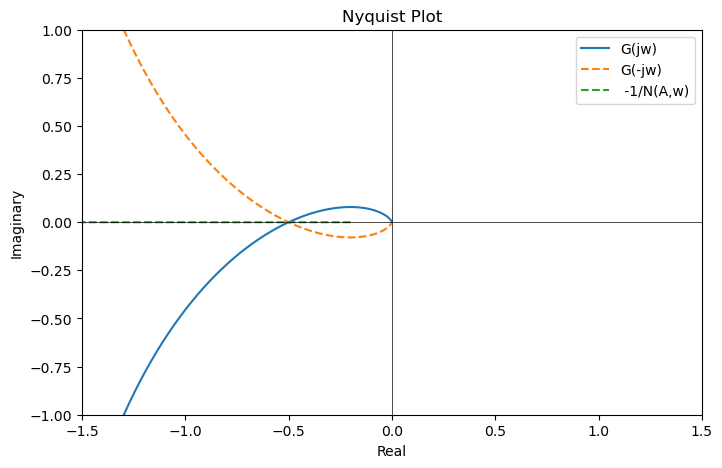

In [27]:
w = np.logspace(-4, 4, 10000)
A = np.logspace(-4, 4, 10000)

GCp = G(1j*w)
GCn = G(-1j*w)

N_inv_neg = -1/describing_func(A)

plt.figure(figsize=(8,5))
plt.plot(np.real(GCp), np.imag(GCp))
plt.plot(np.real(GCn), np.imag(GCn), linestyle='dashed')
plt.plot(np.real(N_inv_neg), np.imag(N_inv_neg), linestyle='dashed')
plt.xlim([-1.5, 1.5])
plt.ylim([-1, 1])
plt.title("Nyquist Plot")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.legend(["G(jw)", "G(-jw)"," -1/N(A,w)"])
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.show()

## Closed Loop System - Step Input

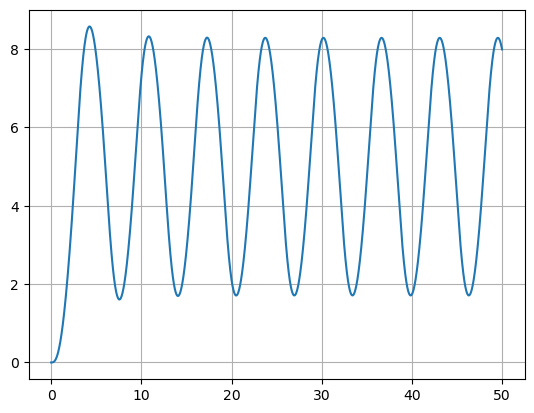

In [28]:
sys = System(G_ss, T_STEP)
n = int(SIM_TIME/T_STEP)

# Step input of amplitude 5

u = [5]*n
u[0] = 0

y = [0]
e = [0]
x = [0]
t = [0]

for i in range(1,n):
    e.append(u[i]-y[i-1])
    x.append(sat(e[i]))
    y.append(sys(x[i]))
    t.append(sys.t_step*i)

plt.plot(t,y)
plt.grid()
plt.show()

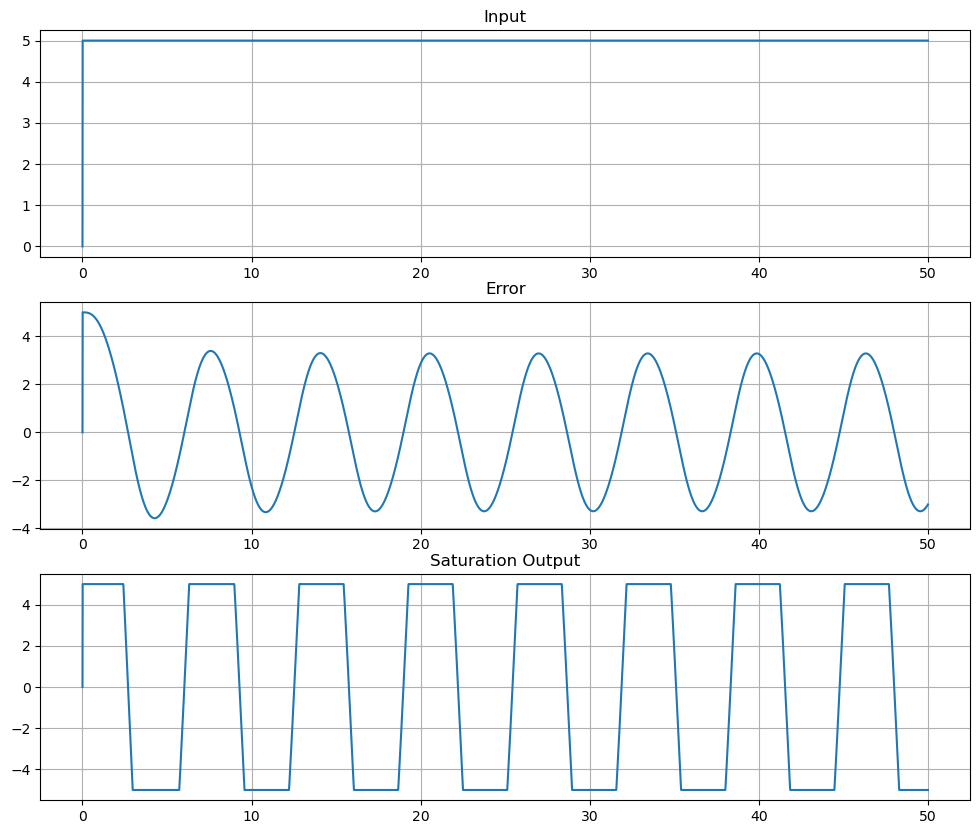

In [29]:
plt.figure(figsize=(12,10))

plt.subplot(3,1,1)
plt.title("Input")
plt.grid()
plt.plot(t, u)

plt.subplot(3,1,2)
plt.title("Error")
plt.grid()
plt.plot(t, e)

plt.subplot(3,1,3)
plt.title("Saturation Output")
plt.grid()
plt.plot(t, x)

plt.show()